In [168]:
%matplotlib inline
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import plotly.graph_objects as go
import pandas as pd
from math import sqrt
from sklearn.metrics import accuracy_score

## Read the Dataset

In [91]:
data=loadmat('ex6data1.mat')
data
yarr=np.array(data['y'])
xarr=np.array(data['X'])
#x = data['X'] 
#y = (data['y']) 
X1 = xarr[:,0]
X2 = xarr[:,1]
dataset=np.concatenate((xarr,yarr ), axis=1)
dataset



array([[1.9643  , 4.5957  , 1.      ],
       [2.2753  , 3.8589  , 1.      ],
       [2.9781  , 4.5651  , 1.      ],
       [2.932   , 3.5519  , 1.      ],
       [3.5772  , 2.856   , 1.      ],
       [4.015   , 3.1937  , 1.      ],
       [3.3814  , 3.4291  , 1.      ],
       [3.9113  , 4.1761  , 1.      ],
       [2.7822  , 4.0431  , 1.      ],
       [2.5518  , 4.6162  , 1.      ],
       [3.3698  , 3.9101  , 1.      ],
       [3.1048  , 3.0709  , 1.      ],
       [1.9182  , 4.0534  , 1.      ],
       [2.2638  , 4.3706  , 1.      ],
       [2.6555  , 3.5008  , 1.      ],
       [3.1855  , 4.2888  , 1.      ],
       [3.6579  , 3.8692  , 1.      ],
       [3.9113  , 3.4291  , 1.      ],
       [3.6002  , 3.1221  , 1.      ],
       [3.0357  , 3.3165  , 1.      ],
       [1.5841  , 3.3575  , 0.      ],
       [2.0103  , 3.2039  , 0.      ],
       [1.9527  , 2.7843  , 0.      ],
       [2.2753  , 2.7127  , 0.      ],
       [2.3099  , 2.9584  , 0.      ],
       [2.8283  , 2.6309 

# Split dataset for train and test

In [132]:
from sklearn.model_selection import train_test_split

def traintest():
    return train_test_split(xarr,yarr, test_size=0.30, random_state=0)

def traintest2():
    return train_test_split(X1,X2, test_size=0.30, random_state=0)

x_train, x_test, y_train, y_test = traintest()
x_train,x_test
dataset2=np.concatenate((x_train,y_train ), axis=1)
dataset2
dataset3=np.concatenate((x_test,y_test ), axis=1)

## Plot the data

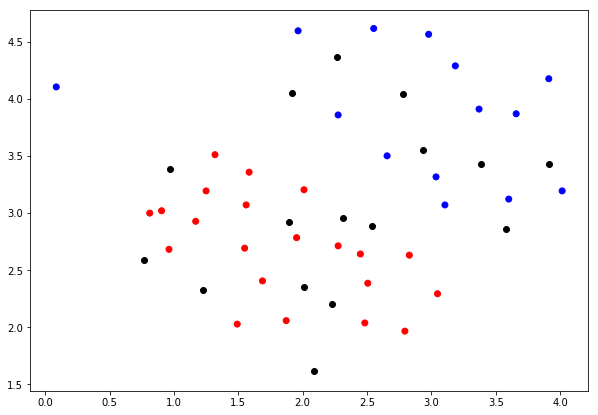

In [147]:

plotData()

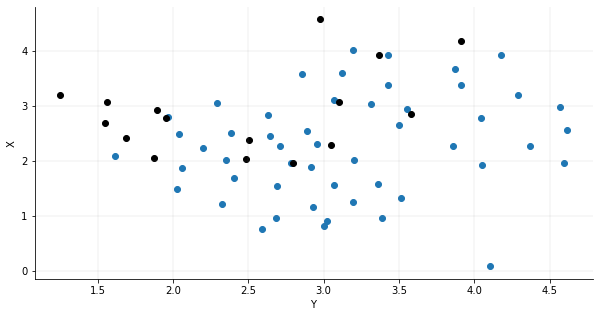

In [45]:
def plotData(x1,x2):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(x1,x2)
    x_train, x_test, x2_train, x2_test = traintest2()
    ax.scatter(x_test,x2_test,color='black')
    #adds a title and axes labels
    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #adds major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.show()
    
plotData(X2,X1)

In [121]:

#fig = go.Figure(data=go.Scatter(x=xarr, y=x, mode='markers'))
#fig.show()
#fig.add_trace(go.Scatter(x=x_test, y=y_test,
 #                   mode='markers',
  #                  name='x2'))


#### Create and Visualize kNN

In [198]:
def distan(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def neighb(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = distan(test_row, train_row)
        distances.append((train_row, dist))
        distances.sort(key=lambda tup: tup[1])
        neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

row0 = dataset[0]
for row in dataset:
	distance = distan(row0, row)
	print('Dist:',distance)

neighbors = neighb(dataset, dataset[0], 3)
for neighbor in neighbors:
	print('Neighbors:',neighbor)



Dist: 0.0
Dist: 0.7997469849896276
Dist: 1.0142617019290436
Dist: 1.423362824440768
Dist: 2.3723411432591224
Dist: 2.4841446193810857
Dist: 1.8355184471968675
Dist: 1.9917010719482986
Dist: 0.9870801233942461
Dist: 0.587857550772294
Dist: 1.563802292490966
Dist: 1.904141615006615
Dist: 0.5442559140698426
Dist: 0.3746601927080058
Dist: 1.2948217831037598
Dist: 1.2591731612451087
Dist: 1.842846496591618
Dist: 2.269749889304987
Dist: 2.2017415311521016
Dist: 1.6686073834188795
Dist: 1.2952572254189512
Dist: 1.3925599592118107
Dist: 1.8114371421608864
Dist: 1.9085098899403168
Dist: 1.6733770196820557
Dist: 2.1463771895918016
Dist: 2.544573787493693
Dist: 2.610392522208106
Dist: 2.2757377089638426
Dist: 2.5396741602024457
Dist: 2.2415720398862935
Dist: 2.3884794326097927
Dist: 1.6797260282557984
Dist: 1.577233632027925
Dist: 1.9480735612394107
Dist: 2.207385840762779
Dist: 2.611679099736413
Dist: 2.1602900221960937
Dist: 1.847858925892342
Dist: 1.9687931988911378
Dist: 1.5620443015484546
Di

## Compute accuracy

In [152]:
def prediction(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)
pred=prediction(dataset2, x_test, 10)
acc = accuracy_score(y_test, pred)
acc*100






accuracy: 87.5


## Create LinearSVC and train your data

In [194]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
predSVC = clf.predict(x_test)
predSVC


C:\Users\User\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=uint8)

## Compute accuracy

In [227]:
accSVC=accuracy_score(y_test,predSVC)
accSVC*100

100.0

## Visualize the Decision Boundary

No handles with labels found to put in legend.


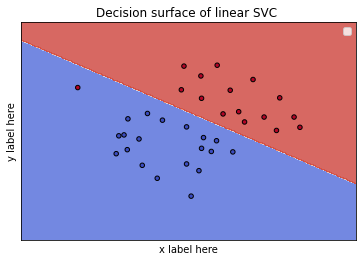

In [247]:

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots

# Set-up grid for plotting.
X0, X1 = x_train[:, 0], x_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

